# Time-series Analysis of Air Quality Data in the United States

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from google.cloud import bigquery
from bq_helper import BigQueryHelper

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

## Looking into Chicago pollutants over the years (1990-2017)

**CHICAGO POLLUTANTS AQI PER  MONTH**

In [27]:
co_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

so2_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

no2_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

o3_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

pm10_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm10_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """

pm25_chi = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'Illinois'
          AND  pollutant.city_name = 'Chicago'
    ORDER BY 
        date ASC
        """
co_chi = bq_assistant.query_to_pandas(co_chi)
so2_chi = bq_assistant.query_to_pandas(so2_chi)
no2_chi = bq_assistant.query_to_pandas(no2_chi)
o3_chi = bq_assistant.query_to_pandas(o3_chi)
pm10_chi = bq_assistant.query_to_pandas(pm10_chi)
pm25_chi = bq_assistant.query_to_pandas(pm25_chi)

In [28]:
co_chi['date'] =  pd.to_datetime(co_chi['date'])
co_chi.set_index('date',drop = True, inplace = True)
co_chi_m = co_chi.groupby(pd.Grouper(freq="M"))
co_chi_month = co_chi_m.mean()

so2_chi['date'] =  pd.to_datetime(so2_chi['date'])
so2_chi.set_index('date',drop = True, inplace = True)
so2_chi_m = so2_chi.groupby(pd.Grouper(freq="M"))
so2_chi_month = so2_chi_m.mean()

no2_chi['date'] =  pd.to_datetime(no2_chi['date'])
no2_chi.set_index('date',drop = True, inplace = True)
no2_chi_m = no2_chi.groupby(pd.Grouper(freq="M"))
no2_chi_month = no2_chi_m.mean()

o3_chi['date'] =  pd.to_datetime(o3_chi['date'])
o3_chi.set_index('date',drop = True, inplace = True)
o3_chi_m = o3_chi.groupby(pd.Grouper(freq="M"))
o3_chi_month = o3_chi_m.mean()

pm10_chi['date'] =  pd.to_datetime(pm10_chi['date'])
pm10_chi.set_index('date',drop = True, inplace = True)
pm10_chi_m = pm10_chi.groupby(pd.Grouper(freq="M"))
pm10_chi_month = pm10_chi_m.mean()

pm25_chi['date'] =  pd.to_datetime(pm25_chi['date'])
pm25_chi.set_index('date',drop = True, inplace = True)
pm25_chi_m = pm25_chi.groupby(pd.Grouper(freq="M"))
pm25_chi_month = pm25_chi_m.mean()

In [29]:
co_chi = 'Chicago CO has ' + repr(co_chi_month.aqi.count()) + ' total monthly observations.'
so2_chi = 'Chicago SO2 has ' + repr(so2_chi_month.aqi.count()) + ' total monthly observations.'
no2_chi = 'Chicago NO2 has ' + repr(no2_chi_month.aqi.count()) + ' total monthly observations.'
o3_chi = 'Chicago O3 has ' + repr(o3_chi_month.aqi.count()) + ' total monthly observations.'
pm10_chi = 'Chicago PM10 has ' + repr(pm10_chi_month.aqi.count()) + ' total monthly observations.'
pm25_chi = 'Chicago PM25 has ' + repr(pm25_chi_month.aqi.count()) + ' total monthly observations.'

print(co_chi)
print(so2_chi)
print(no2_chi)
print(o3_chi)
print(pm10_chi)
print(pm25_chi)


Chicago CO has 276 total monthly observations.
Chicago SO2 has 333 total monthly observations.
Chicago NO2 has 333 total monthly observations.
Chicago O3 has 333 total monthly observations.
Chicago PM10 has 252 total monthly observations.
Chicago PM25 has 195 total monthly observations.


In [30]:
chicago_pollutants = pd.concat([co_chi_month, so2_chi_month, no2_chi_month, o3_chi_month, pm10_chi_month, pm25_chi_month], axis=1, sort=False)
chicago_pollutants.columns = ['CO','SO2','NO2','O3','PM10','PM25']
chicago_pollutants.head()

,CO,SO2,NO2,O3,PM10,PM25
date,,,,,,
1990-01-31,19.625000,21.798387,34.576087,11.500000,39.312500,NaN
1990-02-28,18.428571,22.625000,39.250000,18.267857,27.645833,NaN
1990-03-31,14.442308,21.516129,40.182796,22.000000,30.196078,NaN
1990-04-30,17.781818,26.218487,48.944444,26.333333,33.981132,NaN
1990-05-31,17.206897,24.991935,42.666667,34.016129,40.018182,NaN


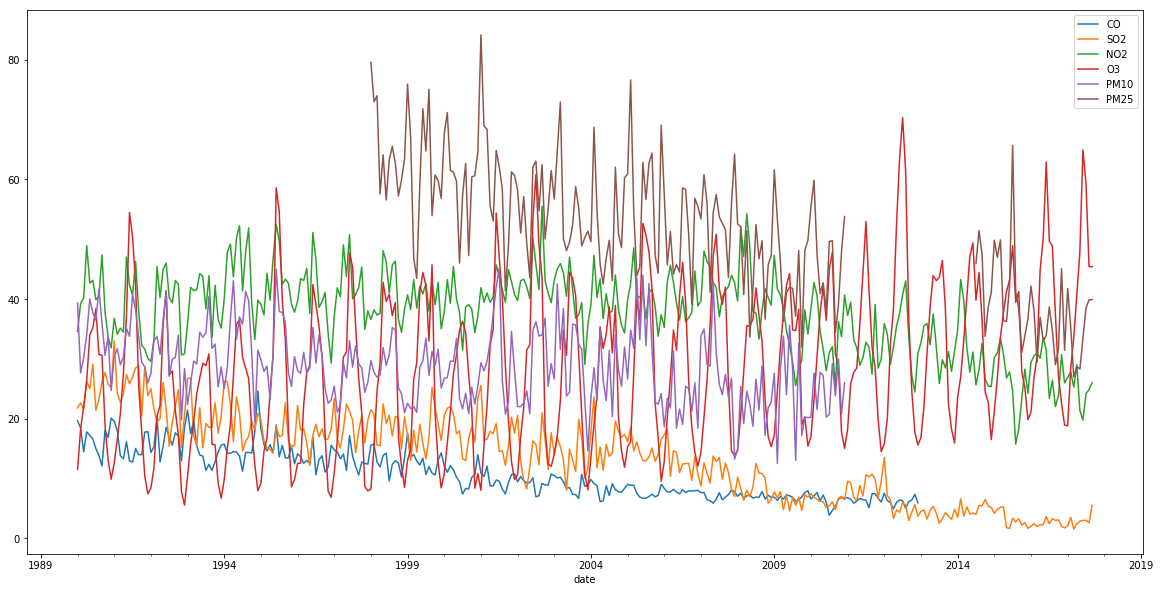

In [31]:
chicago_pollutants.plot( y=['CO','SO2','NO2','O3','PM10','PM25'],figsize=(20,10))
plt.show(fig)

In [32]:
chicago_pollutants.to_csv('chicago_pollutants.csv', index = True)

**Ozone - Honolulu (Best 2018) vs. Chicago vs. Los Angeles (Worst 2018)**

In [33]:
#SQL Query
o3_hon = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary` as pollutant
      WHERE 
        pollutant.poc = 2 
        AND pollutant.state_name = 'Hawaii'
          AND  pollutant.city_name = 'Honolulu'
    ORDER BY 
        date ASC
        """

o3_la = """
    SELECT
        pollutant.date_local as date,
        pollutant.aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary` as pollutant
      WHERE 
          pollutant.poc = 1 
          AND  pollutant.state_name = 'California'
          AND  pollutant.city_name = 'Los Angeles'
    ORDER BY 
        date ASC
        """

#Big Query Function to interact with database
o3_hon = bq_assistant.query_to_pandas(o3_hon)
o3_la = bq_assistant.query_to_pandas(o3_la)

#Convert daily data to monthly data
o3_hon['date'] =  pd.to_datetime(o3_hon['date'])
o3_hon.set_index('date',drop = True, inplace = True)
o3_hon_m = o3_hon.groupby(pd.Grouper(freq="M"))
o3_hon_month = o3_hon_m.mean()

o3_la['date'] =  pd.to_datetime(o3_la['date'])
o3_la.set_index('date',drop = True, inplace = True)
o3_la_m = o3_la.groupby(pd.Grouper(freq="M"))
o3_la_month = o3_la_m.mean()


o3_comp = pd.concat([o3_hon_month, o3_chi_month,o3_la_month], axis=1, sort=False)
o3_comp.columns = ['Honolulu','Chicago','Los Angeles']
o3_comp.to_csv('o3_comp.csv', index = True)

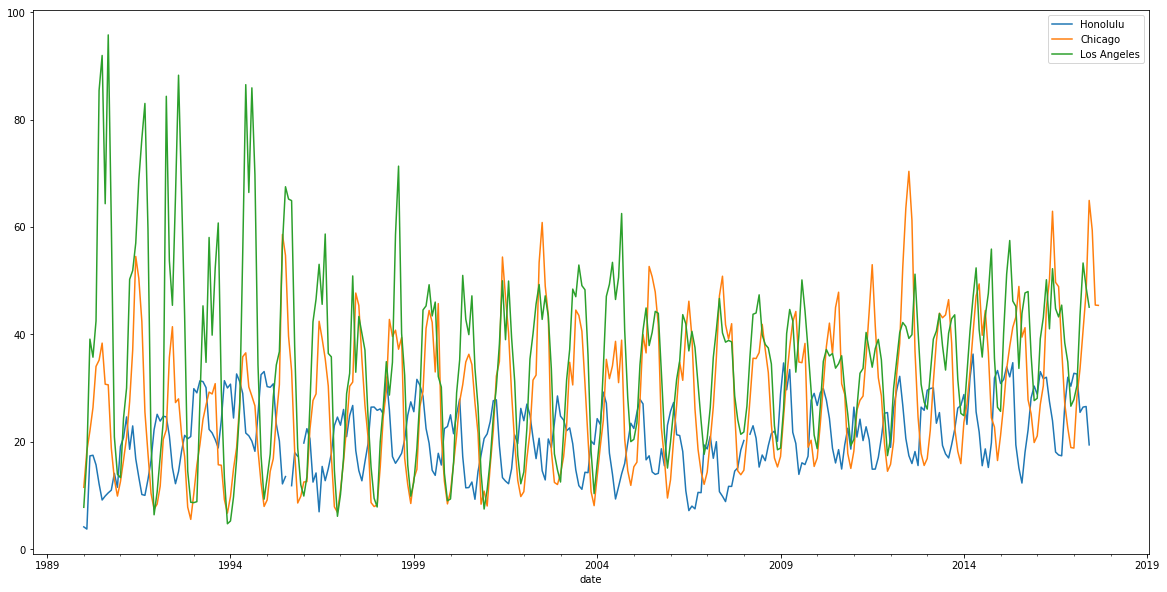

In [34]:
o3_comp.plot( y=['Honolulu','Chicago', 'Los Angeles'],figsize=(20,10))
plt.show(fig)